# Scrap Account Data

#### Import necessary modules

In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt

from FindMoreUsers import find_more_users

from datetime import date

#### Find date to make new subfolder

In [3]:
today = date.today()
# YYYYmmdd
folder = today.strftime("%Y%m%d")
print(folder)

20220517


In [12]:
path = f'./{folder}/'
data_path = f'{path}data/'

## Check whether the specified path exists or not
isExist = os.path.exists(data_path)

if not isExist:
    ## Create a new directory because it does not exist 
    os.makedirs(data_path)
    print("The new directory is created!")

#### Find new accounts from seeded accounts

In [14]:
def accounts_to_csv(depth, base_account):
    set_of_accounts = find_more_users(base_account, set(), depth)
    print(len(set_of_accounts))
    
    df = pd.DataFrame(set_of_accounts, columns = ['User', 'Tag', 'Rank', 'Position', 'KD', 'Assists', 'Headshot %', 'Ability Usage'])
    df.to_csv(f'{base_account}_depth{depth}.csv', index=False)

In [9]:
initial_set={
        'me' : ('beta4days', 'dogw'),
        'iron' : ('SEN Kyu', '9771'),
        'bronze' : ('alam2881', 'NA111'),
        'silver' : ('milk green tea', 'boba'),
        'gold' : ('Tomato Taco', '5111'),
        'platinum' : ('Symperion', '4KT'),
        'diamond' : ('Kisuke', 'zzz'),
        'immortal' : ('Toph', '00001'),
        'radiant' : ('BabyJ', 'Halo'),
}

depth = 3

In [ ]:
accounts_to_csv(depth, initial_set['me'])

In [ ]:
accounts_to_csv(depth, initial_set['iron'])

In [ ]:
accounts_to_csv(depth, initial_set['bronze'])

In [38]:
accounts_to_csv(depth, initial_set['silver'])

565


In [23]:
accounts_to_csv(depth, initial_set['gold'])

951


In [ ]:
accounts_to_csv(depth, initial_set['platinum'])

In [ ]:
accounts_to_csv(depth, initial_set['diamond'])

In [24]:
accounts_to_csv(depth, initial_set['immortal'])

883


In [25]:
accounts_to_csv(depth, initial_set['radiant'])

709


#### Merges all csv files into one and removed duplicate rows

In [47]:
df = pd.DataFrame()

files = [file for file in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, file))]

for file in files:
    df = pd.concat([df, pd.read_csv(f'{data_path}{file}')])
    
df = df.drop_duplicates(subset=['User', 'Tag'], keep='last')

print(df.shape[0])
df.head()

df.to_csv(f'{subpath}total_accounts_list.csv', index=False)

7519


#### Plots current rank distribution I have

In [48]:
rank_order = ['Iron 1', 'Iron 2', 'Iron 3', 
              'Bronze 1', 'Bronze 2', 'Bronze 3',
              'Silver 1', 'Silver 2', 'Silver 3',
              'Gold 1', 'Gold 2', 'Gold 3',
              'Platinum 1', 'Platinum 2', 'Platinum 3',
              'Diamond 1', 'Diamond 2', 'Diamond 3',
              'Immortal 1', 'Immortal 2', 'Immortal 3',
              'Radiant']
color_order = ['#5d5d5d', '#5d5d5d', '#5d5d5d', 
               '#966c18', '#966c18', '#966c18',
               '#e1e8e7', '#e1e8e7', '#e1e8e7',
               '#e9c44c', '#e9c44c', '#e9c44c',
               '#52d5de', '#52d5de', '#52d5de',
               '#f197f4', '#f197f4', '#f197f4',
               '#b02638', '#b02638', '#b02638',
               '#ffffb5']

In [49]:
groupby_ranked = df.groupby(['Rank']).count()['User']
groupby_ranked = groupby_ranked.reindex(rank_order)
print(groupby_ranked)

groupby_ranked.to_csv(f'{subpath}rank_dist.csv', index=False)

Rank
Iron 1         90
Iron 2        146
Iron 3        319
Bronze 1      408
Bronze 2      509
Bronze 3      513
Silver 1      520
Silver 2      419
Silver 3      380
Gold 1        451
Gold 2        376
Gold 3        417
Platinum 1    366
Platinum 2    260
Platinum 3    208
Diamond 1     246
Diamond 2     211
Diamond 3     253
Immortal 1    252
Immortal 2    217
Immortal 3    495
Radiant       237
Name: User, dtype: int64


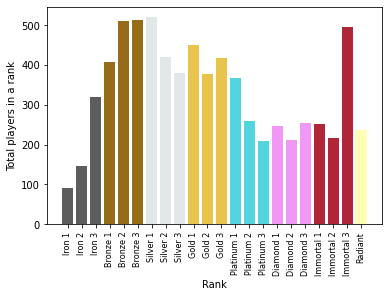

In [50]:
plt.bar(rank_order, groupby_ranked, color=color_order)
plt.xticks(rank_order, rotation='vertical', size=8)
plt.ylabel('Total players in a rank')
plt.xlabel('Rank')
plt.save(f'{path}rank_dist.png')
plt.show()

# fairly similiar to distribution found on
    # https://tracker.gg/valorant/leaderboards/ranked/all/default?page=1
    # however, we need more mid and lower ranks to 
        # replicate the distribution on tracker.gg